## Working Notebook


In [1]:
# import python libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# open the first data file
title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
# open the second data file
title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz')
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
# open the third data file
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Cleaning

Clean the first data frame: title_basics

In [5]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# rename columns for future merging
title_basics.rename(columns = {'primary_title':'movie'}, inplace = True)

In [7]:
# drop columns not being used for analysis
title_basics.drop(columns = ["original_title", "start_year","runtime_minutes"], inplace=True)

In [8]:
title_basics.dropna(subset= ['genres'], inplace = True)

In [45]:
# calculate percentage of nulls dropped

In [9]:
title_basics.head()

,tconst,movie,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


Clean the third data frame: movie_budgets

In [10]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# change release date to date-time
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [12]:
# change production_budget, domestic_gross, and worldwide_budget to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
# drop id column
movie_budgets.drop(columns = ["id"], inplace=True)

In [14]:
# drop rows where worldwide_gross or production_budget is 0
movie_budgets = movie_budgets[movie_budgets.worldwide_gross != 0]
movie_budgets = movie_budgets[movie_budgets.production_budget != 0]

In [15]:
# add a profit column to movie_budgets
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [16]:
# calculate profit in millions
movie_budgets['profit_million']=(movie_budgets['profit']/1000000)

In [17]:
# calculate production budget in millions
movie_budgets['production_budget_million']=(movie_budgets['production_budget']/1000000)

In [18]:
# add a column ROI calculating the return on investment
movie_budgets['ROI'] = (movie_budgets['profit'] / movie_budgets['production_budget']) * 100

In [19]:
# round ROI to 2 decimal places
movie_budgets = movie_budgets.round({'ROI': 2})

In [20]:
# add a column for movie year
movie_budgets['year'] = pd.DatetimeIndex(movie_budgets['release_date']).year

In [21]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2351.345279,425.0,553.26,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,635.063875,410.6,154.67,2011
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-200.237650,350.0,-57.21,2019
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,1072.413963,330.6,324.38,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,999.721747,317.0,315.37,2017


# Merging Data Tables

In [22]:
# merge title_basics and title_ratings on tconst
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data.head()
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73051
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   movie          73052 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73052 non-null  float64
 4   numvotes       73052 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [23]:
# merge imdb_data with movie_budgets
mdf = pd.merge(imdb_data, movie_budgets, how = 'inner', on = 'movie')
mdf.head()

,tconst,movie,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year
0,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,2012-12-31,45000000.0,0.0,73706.0,-44926294.0,-44.926294,45.0,-99.84,2012
1,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,2013-03-22,25000000.0,720828.0,9313302.0,-15686698.0,-15.686698,25.0,-62.75,2013
2,tt4339118,On the Road,Drama,6.0,6,2013-03-22,25000000.0,720828.0,9313302.0,-15686698.0,-15.686698,25.0,-62.75,2013
3,tt5647250,On the Road,Drama,5.7,127,2013-03-22,25000000.0,720828.0,9313302.0,-15686698.0,-15.686698,25.0,-62.75,2013
4,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0,96861183.0,96.861183,91.0,106.44,2013


In [24]:
mdf.shape

(2592, 14)

In [25]:
mdf=mdf.sort_values(by='numvotes', ascending = False)

In [27]:
# drop duplicate titles
mdf = mdf.drop_duplicates(subset='movie')

In [28]:
mdf.shape

(1924, 14)

In [29]:
# drop tconst, unnecessary after merge
mdf.drop(columns = ["tconst"], inplace=True)

In [30]:
mdf.shape

(1924, 13)

In [31]:
# separate genres into lists
mdf["genres"] = mdf["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

In [32]:
# filter for movies released after 1990 
mdf = mdf.loc[mdf['year'] >= 1990]

In [33]:
mdf.shape

(1877, 13)

In [34]:
#explode the genres
mdf2 = mdf.explode('genres')

In [35]:
mdf2['genres'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Western',
       'Biography', 'Crime', 'Mystery', 'Comedy', 'Family', 'Fantasy',
       'Animation', 'Romance', 'Music', 'History', 'Horror', 'Sport',
       'War', 'Musical', 'Documentary', 'News'], dtype=object)

In [36]:
len(mdf2['genres'].unique())

22

In [37]:
mdf2.shape

(4634, 13)

In [38]:
sorted_genres = mdf2.groupby(["genres"], as_index=False).mean().sort_values(by = "ROI", ascending=False)

top5genres = list(sorted_genres['genres'].values[0:5])
top5genres

['Mystery', 'Horror', 'Thriller', 'Animation', 'News']

In [39]:
sorted_genres

,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year
14,Mystery,6.148408,109883.235669,2.434895e+07,3.738033e+07,8.507597e+07,6.072702e+07,60.727019,24.348949,826.215669,2012.713376
11,Horror,5.698630,63743.538813,2.042418e+07,3.440050e+07,7.893424e+07,5.851006e+07,58.510061,20.424178,803.417123,2012.164384
19,Thriller,6.093711,104135.305031,3.166840e+07,3.986986e+07,1.003344e+08,6.866597e+07,68.665973,31.668405,498.530189,2011.562893
2,Animation,6.558621,110485.206897,9.106034e+07,1.224411e+08,3.387696e+08,2.477092e+08,247.709234,91.060345,329.104138,2013.267241
15,News,7.000000,31.000000,1.200000e+07,6.730578e+06,4.673058e+07,3.473058e+07,34.730578,12.000000,289.420000,1993.000000
13,Musical,6.300000,48267.923077,3.110769e+07,5.347108e+07,1.001199e+08,6.901222e+07,69.012221,31.107692,266.106154,2007.000000
12,Music,6.474603,56407.968254,1.587651e+07,3.195805e+07,6.930826e+07,5.343175e+07,53.431747,15.876508,264.435556,2012.603175
9,Fantasy,6.096324,135062.014706,7.719853e+07,7.562849e+07,2.170640e+08,1.398655e+08,139.865494,77.198529,240.211176,2012.727941
17,Sci-Fi,6.452564,240831.814103,8.238360e+07,1.059298e+08,2.888659e+08,2.064823e+08,206.482337,82.383605,240.164551,2013.012821
1,Adventure,6.484833,182470.120823,9.823907e+07,1.152562e+08,3.252523e+08,2.270132e+08,227.013194,98.239072,233.903779,2013.478149


# Question 3

How does the amount of money invested into the movie (aka the production budget) impact the return on investment?

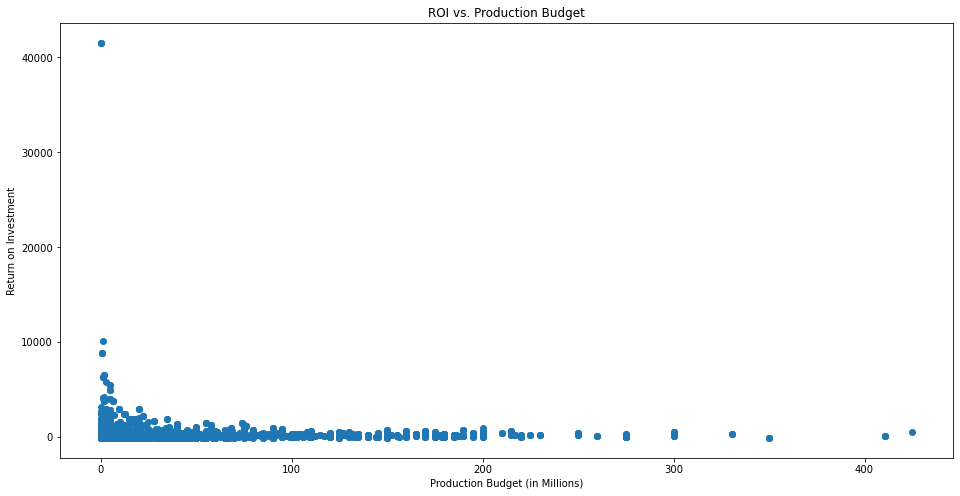

In [40]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(mdf2['production_budget_million'], mdf2['ROI'])
ax.set_title('ROI vs. Production Budget')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment');

In [41]:
mdf['ROI'].sort_values(ascending=False)

1722    41556.47
782     10075.95
1522     8858.63
828      6558.06
2189     6336.42
          ...   
566       -99.95
1590      -99.98
1853      -99.98
813       -99.99
2368     -100.00
Name: ROI, Length: 1877, dtype: float64

In [42]:
top5genres

['Mystery', 'Horror', 'Thriller', 'Animation', 'News']

In [43]:
mdf2
boolean_series = mdf2.genres.isin(top5genres)
filtered_top5_df = mdf2[boolean_series]
filtered_top5_df

,movie,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_million,production_budget_million,ROI,year
477,The Dark Knight Rises,Thriller,8.4,1387769,2012-07-20,275000000.0,448139099.0,1.084439e+09,809439099.0,809.439099,275.000,294.34,2012
256,Shutter Island,Mystery,8.1,1005960,2010-02-19,80000000.0,128012934.0,2.994618e+08,219461782.0,219.461782,80.000,274.33,2010
256,Shutter Island,Thriller,8.1,1005960,2010-02-19,80000000.0,128012934.0,2.994618e+08,219461782.0,219.461782,80.000,274.33,2010
1690,Gone Girl,Mystery,8.1,761592,2014-10-03,61000000.0,167767189.0,3.685672e+08,307567189.0,307.567189,61.000,504.21,2014
1690,Gone Girl,Thriller,8.1,761592,2014-10-03,61000000.0,167767189.0,3.685672e+08,307567189.0,307.567189,61.000,504.21,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,Duplicity,Mystery,8.1,8,2009-03-20,60000000.0,40572825.0,8.107957e+07,21079566.0,21.079566,60.000,35.13,2009
2041,The Glass House,Thriller,7.4,8,2001-09-14,22000000.0,17951431.0,2.286178e+07,861785.0,0.861785,22.000,3.92,2001
1472,The Wash,Thriller,7.4,7,2001-11-14,4000000.0,10097096.0,1.009710e+07,6097096.0,6.097096,4.000,152.43,2001
2591,The Terrorist,Thriller,6.0,6,2000-01-14,25000.0,195043.0,1.950430e+05,170043.0,0.170043,0.025,680.17,2000


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 510      NaN
510      NaN
510      NaN
477      NaN
477     blue
        ... 
2000     NaN
2000     NaN
2000     NaN
2040     NaN
2040     NaN
Name: genres, Length: 4634, dtype: object

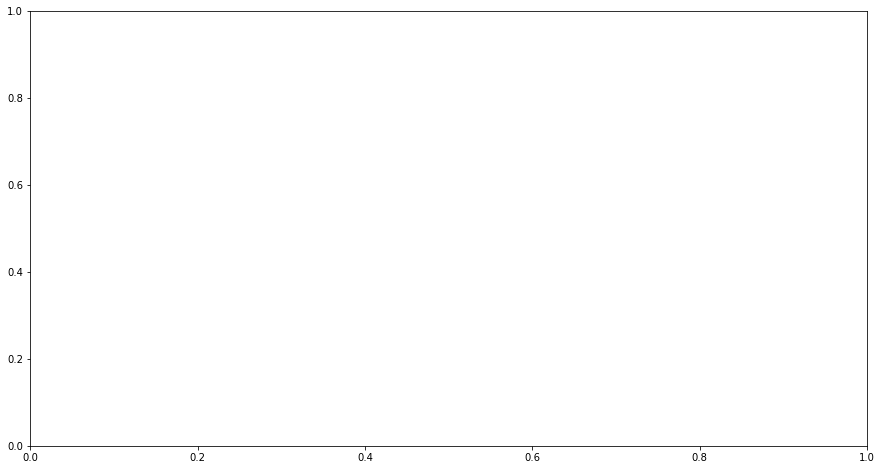

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
colors = {'Mystery':'red', 'Horror':'green', 'Thriller':'blue', 'News':'orange', 'Music':'purple'}


ax.scatter(mdf2['production_budget_million'], mdf2['ROI'], c = mdf2['genres'].map(colors))
ax.set_title('ROI vs. Production Budget')
ax.set_xlabel('Production Budget (in Millions)')
ax.set_ylabel('Return on Investment');